In [585]:
# The very first thing is making  data frame but before that let's specify some parameters

# our Sample rate is 1 that is simply put 1 sample per second
# The Measuring error of our device is 1% of the measured value
# The actual value is 75

In [586]:
#now with all the parameters specified let's start getting a dataframe
# we assume that our sensor generates a dataframe every minute so with our smaple rate of 1 that gives us 
# a list of 60 measured values in a single frame

#assuming our Measured data is in range (72,78)
# first we need to select 60 values for our frame

In [587]:
import matplotlib.pyplot as plt
import numpy as np
actual_val=75


In [588]:
import random as rd
possible_data_values=[72,73,74,75,76,77]
data=[]
for i in range(0,60):
    index=rd.randrange(len(possible_data_values))
    data.append(possible_data_values[index])
#we got our data packet let's see
print("Data packet size  : ",len(data),"\nData Values are : ",data)

Data packet size  :  60 
Data Values are :  [77, 77, 77, 76, 77, 76, 76, 75, 72, 77, 72, 75, 76, 74, 76, 73, 77, 74, 77, 72, 75, 72, 74, 76, 77, 76, 75, 75, 73, 76, 76, 74, 73, 75, 73, 72, 73, 72, 77, 77, 75, 76, 75, 73, 77, 72, 76, 77, 76, 73, 74, 76, 72, 76, 73, 77, 74, 76, 72, 77]


In [589]:
#let's visualize our data stream with respect to actual to data so we can undertand how it works
time=[]
actual=[]
for i in range(0,60):
    time.append(i)
    actual.append(75)

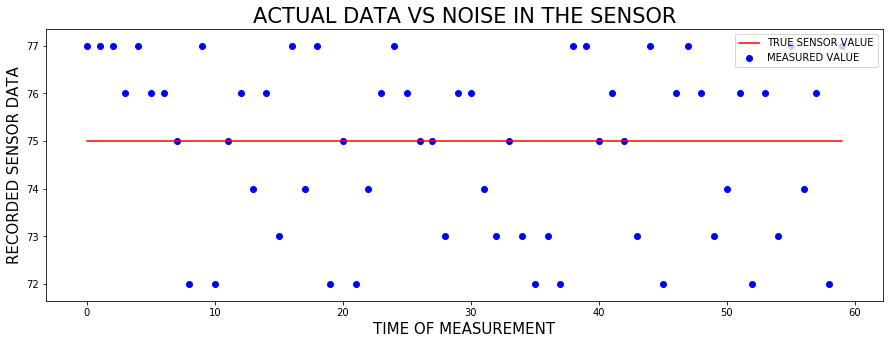

In [622]:
RAW=plt.figure(figsize=(15,5))
plt.title("ACTUAL DATA VS NOISE IN THE SENSOR",fontsize=21)
plt.xlabel("TIME OF MEASUREMENT",fontsize=15)
plt.ylabel("RECORDED SENSOR DATA",fontsize=15)
plt.plot(time,actual,color='red',label='TRUE SENSOR VALUE')
plt.scatter(time,data,color='blue',label='MEASURED VALUE')
plt.legend(loc='upper right')
plt.savefig("ACTUAL_DATA_VS_NOISE.png")

In [591]:
#Well one thong is clear we won't be able to make sure what our underlying signal is with all the
#noise our sensor generates
# this is the real life scenario where due to vibrations and noise from other machines actually hinder your 
# sensors performance
# in order to get rid of this we apply filters 


In [597]:
# MOVING AVERAGE FILTER this cell here is our entire filter function
#so we do a step by step increment in our average value and try to plot the data
# so every time we take a data we get average of it
average=0
suml=0
avglist=[]
n=1
for i in range(0,60):
    suml=suml+data[i]
    average=(suml)/n
    avglist.append(average)
    n=n+1


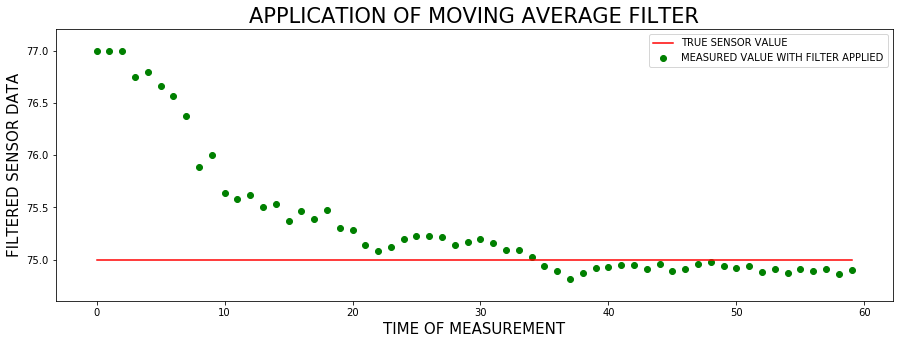

In [623]:
SMF=plt.figure(figsize=(15,5))
plt.title("APPLICATION OF MOVING AVERAGE FILTER",fontsize=21)
plt.xlabel("TIME OF MEASUREMENT",fontsize=15)
plt.ylabel("FILTERED SENSOR DATA",fontsize=15)
plt.plot(time,actual,color='red',label='TRUE SENSOR VALUE')
plt.scatter(time,avglist,color='green',label='MEASURED VALUE WITH FILTER APPLIED')
plt.legend(loc='upper right')
plt.savefig("APPLICATION_OF_MOVING_FILTER.png")

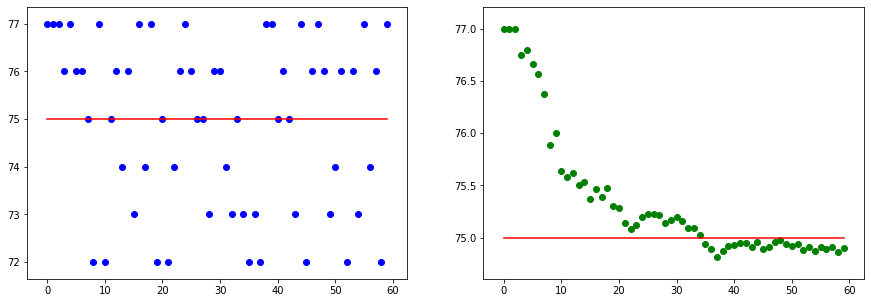

In [668]:
#well let's just see what our filter did to the data in a side by side comparison
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax.plot(time,actual,color='red',label='TRUE SENSOR VALUE')
ax.scatter(time,data,color='blue',label='MEASURED VALUE')
ax2.plot(time,actual,color='red',label='TRUE SENSOR VALUE')
ax2.scatter(time,avglist,color='green',label='MEASURED VALUE WITH FILTER APPLIED')

In [664]:
#well guess What ?? Our filter works beautifully
# but it's not yet complete we haven't accounted for our Measuring Error or device error 
# let's assume our device measure with an error of 1%
# well in order to work with our error correction we have to understand one simple thing
# True Value = Measured Value - Error in measurement

In [618]:
eravg=[]
for i in avglist:
    i=i-(0.01*i)
    eravg.append(i)
# well now that we have our data with error correction let's how it stands up to the measured data and our
#true value
true=[]
for j in actual:
    j=j-(0.01*j)
    true.append(j)

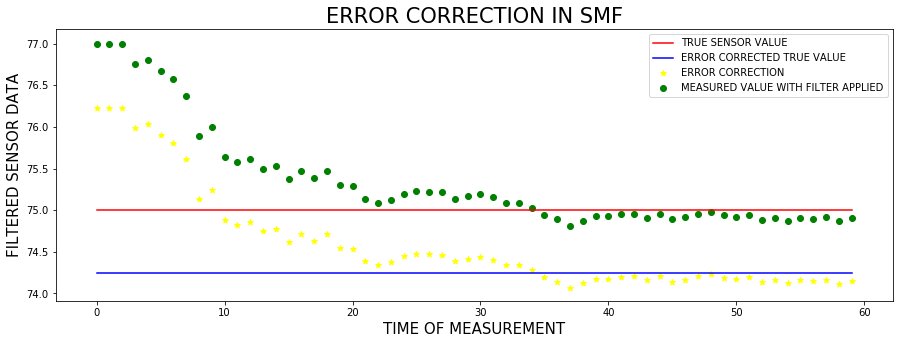

In [624]:
SMFE=plt.figure(figsize=(15,5))
plt.title("ERROR CORRECTION IN SMF",fontsize=21)
plt.xlabel("TIME OF MEASUREMENT",fontsize=15)
plt.ylabel("FILTERED SENSOR DATA",fontsize=15)
plt.plot(time,actual,color='red',label='TRUE SENSOR VALUE')
plt.plot(time,true,color='blue',label='ERROR CORRECTED TRUE VALUE')
plt.scatter(time,eravg,color='yellow',marker='*',label='ERROR CORRECTION')
plt.scatter(time,avglist,color='green',label='MEASURED VALUE WITH FILTER APPLIED')
plt.legend(loc='upper right')
plt.savefig("ERROR_CORRECTION_IN_SMF.png")

In [621]:
#well finally we actually did created a filter for noise reduction for our sensor and made
#device fault correction in it